In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Dropout,MaxPooling2D,UpSampling2D,Flatten
import pandas as pd
import os
import numpy as np
import shutil
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path1='/content/drive/MyDrive/HAM10000_images_part_1'
file_path2='/content/drive/MyDrive/HAM10000_images_part_2'

In [ ]:
metadata=pd.read_csv('/content/HAM10000_metadata.csv')

In [ ]:
file_path='/content/drive/MyDrive/ProjectOfDeepLEarningr'

In [ ]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
train_data_dir='/content/drive/MyDrive/DeepLearningCA'

batch_size=32
image_size=(28,28)
datagen=ImageDataGenerator(rescale=1./255)
train_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='input',
    shuffle=True
)

Found 5004 images belonging to 1 classes.


In [ ]:
input_shape=(28,28,1)
# encoder
inputs =Input(shape=input_shape)
x=Conv2D(16,(3,3),activation='relu',padding='same')(inputs)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(8,(3,3),activation='relu', padding='same')(x)
encoded=MaxPooling2D((2,2),padding='same')(x)
# decoder
x=Conv2D(8,(3,3),activation='relu',padding='same')(encoded)
x=UpSampling2D((2,2))(x)
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
x=UpSampling2D((2,2))(x)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
autoencoder=Model(inputs,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
autoencoder.fit(train_generator,epochs=10)

Epoch 1/10
157/157 [==============================] - 231s 645ms/step - loss: 0.6490
Epoch 2/10
157/157 [==============================] - 64s 409ms/step - loss: 0.6321
Epoch 3/10
157/157 [==============================] - 64s 409ms/step - loss: 0.6308
Epoch 4/10
157/157 [==============================] - 68s 434ms/step - loss: 0.6303
Epoch 5/10
157/157 [==============================] - 64s 405ms/step - loss: 0.6299
Epoch 6/10
157/157 [==============================] - 65s 415ms/step - loss: 0.6297
Epoch 7/10
157/157 [==============================] - 66s 420ms/step - loss: 0.6295
Epoch 8/10
157/157 [==============================] - 65s 413ms/step - loss: 0.6293
Epoch 9/10
157/157 [==============================] - 65s 413ms/step - loss: 0.6291
Epoch 10/10
157/157 [==============================] - 64s 407ms/step - loss: 0.6290


In [ ]:
encoded_features=autoencoder.predict(train_generator)

157/157 [==============================] - 63s 403ms/step


In [ ]:
encoded_features

array([[[[0.68495005],
         [0.7580076 ],
         [0.75293463],
         ...,
         [0.79927874],
         [0.7806987 ],
         [0.7337585 ]],

        [[0.7222654 ],
         [0.7472491 ],
         [0.76603585],
         ...,
         [0.7957378 ],
         [0.7900433 ],
         [0.74421704]],

        [[0.7253867 ],
         [0.7516328 ],
         [0.7627061 ],
         ...,
         [0.80332196],
         [0.8039041 ],
         [0.77157354]],

        ...,

        [[0.7632479 ],
         [0.7987435 ],
         [0.80583286],
         ...,
         [0.8458967 ],
         [0.8377089 ],
         [0.8056808 ]],

        [[0.7461303 ],
         [0.7782831 ],
         [0.79747766],
         ...,
         [0.8221338 ],
         [0.8189509 ],
         [0.7853566 ]],

        [[0.6899509 ],
         [0.75702846],
         [0.7798244 ],
         ...,
         [0.80363184],
         [0.7856984 ],
         [0.73057735]]],


       [[[0.65547854],
         [0.7201554 ],
         [0.70

In [ ]:
num_samples,width,height,channels=encoded_features.shape
print(num_samples,width,height,channels)

5004 28 28 1


In [ ]:
encoded_features_2d=encoded_features.reshape(num_samples,width*height*channels)

In [ ]:
encoded_features_2d

array([[0.68495005, 0.7580076 , 0.75293463, ..., 0.80363184, 0.7856984 ,
        0.73057735],
       [0.65547854, 0.7201554 , 0.70837694, ..., 0.70939976, 0.6931641 ,
        0.6511295 ],
       [0.6684269 , 0.7384589 , 0.73207265, ..., 0.725889  , 0.7096744 ,
        0.66475636],
       ...,
       [0.49759504, 0.513162  , 0.51978564, ..., 0.69016623, 0.67496675,
        0.63567144],
       [0.62908   , 0.67998725, 0.65957063, ..., 0.6536003 , 0.638581  ,
        0.6107625 ],
       [0.6150328 , 0.65949243, 0.6169975 , ..., 0.553921  , 0.5385535 ,
        0.53340167]], dtype=float32)

In [ ]:
#to predict cluster labels
n_clusters=7
kmeans=KMeans(n_clusters=n_clusters)
cluster_labels=kmeans.fit_predict(encoded_features_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels

array([5, 0, 5, ..., 2, 5, 5], dtype=int32)

In [ ]:
print("Encoded features shape:", encoded_features.shape)
print("Cluster labels shape:", cluster_labels.shape)

Encoded features shape: (5004, 28, 28, 1)
Cluster labels shape: (5004,)


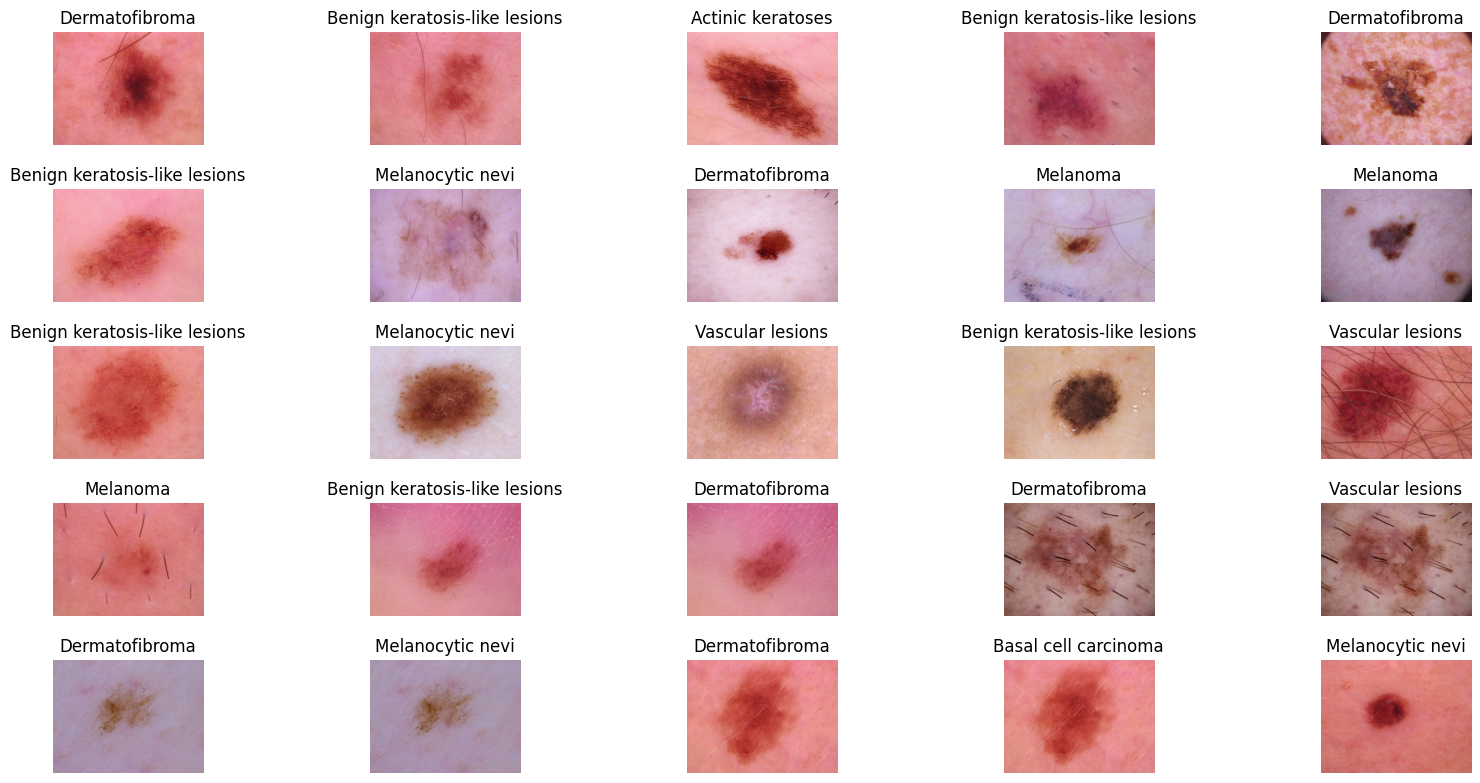

In [ ]:
class_names={
    0:'Melanocytic nevi',
    1:'Melanoma',
    2:'Benign keratosis-like lesions',        # Defining a dictionary
    3:'Basal cell carcinoma',
    4:'Actinic keratoses',
    5:'Vascular lesions',
    6:'Dermatofibroma'
}
fig, axes=plt.subplots(5,5,figsize=(16,8))    # Create a subplot grid
fig.tight_layout()

for i, (filename,label) in enumerate(zip(train_generator.filenames[:25],cluster_labels[:25])):
  img = plt.imread(train_data_dir + '/' +filename)
  row_idx=i//5
  col_idx=i%5
  class_name=class_names[label] if label in class_names else 'Not Found'
  axes[row_idx,col_idx].imshow(img)
  axes[row_idx,col_idx].set_title(class_name)
  axes[row_idx,col_idx].axis('off')

plt.show()


In [ ]:
encoded_features.dtype

dtype('float32')

In [ ]:
input_shape = encoded_features.shape[1:]
print(input_shape)

(28, 28, 1)


In [ ]:
num_classes = len(set(cluster_labels))
print(num_classes)

7


In [ ]:
one_hot_labels = to_categorical(cluster_labels, num_classes=7)
reshaped_labels = np.reshape(cluster_labels, (-1, 1))  # Adding a new dimension

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])
model.compile(optimizer=Adam(),loss=categorical_crossentropy,metrics=['accuracy'])
one_hot_labels=to_categorical(cluster_labels,num_classes=7)

history=model.fit(encoded_features,one_hot_labels,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
126/126 [==============================] - 2s 5ms/step - loss: 1.7989 - accuracy: 0.2293 - val_loss: 1.6018 - val_accuracy: 0.3926
Epoch 2/100
126/126 [==============================] - 0s 4ms/step - loss: 1.4133 - accuracy: 0.3880 - val_loss: 1.3425 - val_accuracy: 0.3676
Epoch 3/100
126/126 [==============================] - 0s 3ms/step - loss: 1.2602 - accuracy: 0.4249 - val_loss: 1.2340 - val_accuracy: 0.4276
Epoch 4/100
126/126 [==============================] - 0s 4ms/step - loss: 1.2296 - accuracy: 0.4397 - val_loss: 1.1866 - val_accuracy: 0.4486
Epoch 5/100
126/126 [==============================] - 1s 4ms/step - loss: 1.2159 - accuracy: 0.4487 - val_loss: 1.1774 - val_accuracy: 0.4545
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 1.1806 - accuracy: 0.4619 - val_loss: 1.1777 - val_accuracy: 0.4595
Epoch 7/100
126/126 [==============================] - 0s 3ms/step - loss: 1.1643 - accuracy: 0.4721 - val_loss: 1.1599 - val_accuracy: 0.4486

In [ ]:
predicted_labels=np.argmax(model.predict(encoded_features), axis=1)

157/157 [==============================] - 0s 2ms/step


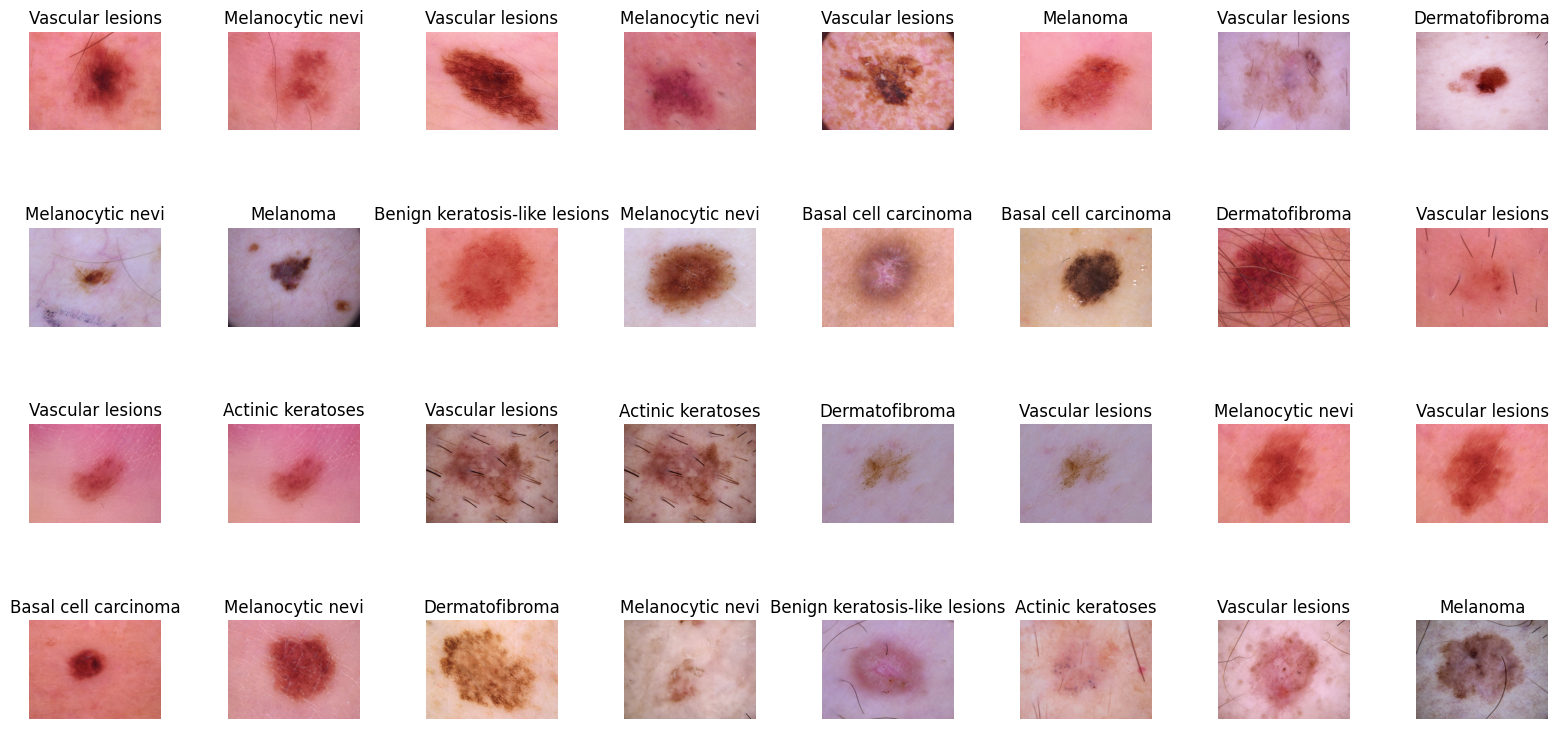

In [ ]:
num_rows=4
num_cols=8
num_images=num_rows*num_cols
fig,axes=plt.subplots(num_rows,num_cols,figsize=(16, 8))
fig.tight_layout()
for i,(filename,label) in enumerate(zip(train_generator.filenames[:num_images],predicted_labels[:num_images])):
    img=plt.imread(train_data_dir+'/'+ filename)
    row_idx=i//num_cols
    col_idx=i%num_cols
    class_name=class_names[label] if label in class_names else 'Unknown'
    axes[row_idx,col_idx].imshow(img)
    axes[row_idx,col_idx].set_title(class_name)
    axes[row_idx,col_idx].axis('off')

plt.show()
